In [216]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:


# Visualisation of Qvar output reading
# Insert the .txt datafile path into read_csv('~') path argument

# NB: Finger mapping may vary.

filename = '/content/drive/Shareddrives/MEng Capstone QVar Project/Data Collection/Trials 8 17/andy data/user_app_class_097_andy_B_400Hz.txt'
data = pd.read_csv(filename, sep='\t')

times_microseconds = data['Timestamp [us]'].tolist()
ax_values = data['A_X [LSB]'].tolist()
qvar_values = data['QVAR [LSB]'].tolist()
channelmarker = data['AFE_CHANNEL [#]'].tolist()

##########
# Cut all data before synchronization event
def Synchronize(times,ax_values,qvar_values):
  index = 0
  tol = 10000
  mean = np.mean(ax_values)
  dev = np.std(ax_values)
  thold = 3 # can possibly change based off of need
  for i in ax_values:
    index = index + 1
    z_scr = (i - mean)/dev
    if abs(z_scr) > thold: #if i > tol or i < tol:
      ntimes = times[0:len(times)-index]
      nqvar_values = qvar_values[index:len(qvar_values)]
      break

  return ntimes,nqvar_values
##########

channels = max(channelmarker) + 1

times_cut,qvar_values = Synchronize(times_microseconds,ax_values,qvar_values)

index = 0
i = 0
while channelmarker[0] != 0:
  times_cut.pop()
  qvar_values = qvar_values[1:len(qvar_values)]
  channelmarker = channelmarker[1:len(channelmarker)]

index = 0
times = []
# ax = []
# channels = max(channelmarker) + 1
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
while index + channels < len(qvar_values):
  times.append(times_cut[index+1])
  # ax.append(ax_values[index+1])
  if channels > 0:
    P1.append(qvar_values[index])
  if channels > 1:
    P2.append(qvar_values[index+1])
  if channels > 2:
    P3.append(qvar_values[index+2])
  if channels > 3:
    P4.append(qvar_values[index+3])
  if channels > 4:
    P5.append(qvar_values[index+4])
  if channels > 5:
    P6.append(qvar_values[index+5])
  index = index + channels

##########
def FingerDifferential(P1,P2,finger1):
  # finger1 = []
  index = 0
  while index < len(P1):
    finger1.append(P1[index] - P2[index])
    index = index + 1

  return finger1
##########

if channels > 3:
  finger1 = []
  finger1 = FingerDifferential(P5,P6,finger1)
  if channels > 2:
    finger2 = []
    finger2 = FingerDifferential(P1,P2,finger2)
  if channels > 4:
    finger3 = []
    finger3 = FingerDifferential(P3,P4,finger3)
else:
  finger1 = P1
  finger2 = P2
  finger3 = P3

data



,Timestamp [us],A_X [LSB],A_Y [LSB],A_Z [LSB],A_X [mg],A_Y [mg],A_Z [mg],AFE_CHANNEL [#],QVAR [LSB],Unnamed: 9
0,1044,10480,-8720,10224,639.280,-531.920,623.664,1,-1648,NaN
1,3542,10528,-8784,10208,642.208,-535.824,622.688,2,-1952,NaN
2,6034,10576,-8912,10160,645.136,-543.632,619.760,3,-2304,NaN
3,8528,10704,-8864,10128,652.944,-540.704,617.808,4,-2720,NaN
4,11022,10720,-8880,10144,653.920,-541.680,618.784,5,-3328,NaN
...,...,...,...,...,...,...,...,...,...,...
25151,64332490,8656,-8704,10816,528.016,-530.944,659.776,5,-8720,NaN
25152,64334984,8672,-8768,10848,528.992,-534.848,661.728,0,-8736,NaN
25153,64337478,8624,-8784,10800,526.064,-535.824,658.800,1,-8960,NaN
25154,64339972,8704,-8752,10768,530.944,-533.872,656.848,2,-8960,NaN


#Function Code


In [219]:
# Center Qvar data on y-axis
def CenterData(qvar_values):
  avg_qvar = sum(qvar_values[0:100])/len(qvar_values[0:100])
  index = 0
  for i in qvar_values:
    index = index + 1
    qvar_values[index-1] = i - avg_qvar

  return qvar_values

# Normalize qvar data

def NormalizeData(qvar_values):
  index = 0
  for i in qvar_values:
    index = index + 1
    qvar_values[index-1] = (i - min(qvar_values)) / (max(qvar_values) - min(qvar_values))

  return qvar_values

# Plot data
def PlotData(times,values,title,colorr):
  plt.plot(times, values, color = colorr, linestyle = 'None',
          marker = '*', markersize = 1, label = "Finger 1")
  plt.xlabel('Time / us')
  plt.ylabel('QVar Values [LSB]')
  plt.title(title, fontsize = 10)
  plt.grid()
  # plt.show()

# Plot Interval Lines
def PlotIntervals():
  # # LAB
  # plt.axvline(x = 0.3e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 0.6e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 0.9e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.2e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.5e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.8e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 2.1e7, color = 'k', alpha=0.4)

  # # LACABA
  # plt.axvline(x = 0.3e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 0.6e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 0.9e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.3e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.6e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.9e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 2.3e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 2.6e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 2.9e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 3.3e7, color = 'k', alpha=0.4)

  # 1min A
  plt.axvline(x = 0.3e7, color = 'k', alpha=0.4)
  plt.axvline(x = 0.6e7, color = 'k', alpha=0.4)
  plt.axvline(x = 0.9e7, color = 'k', alpha=0.4)
  plt.axvline(x = 1.2e7, color = 'k', alpha=0.4)
  plt.axvline(x = 1.5e7, color = 'k', alpha=0.4)
  plt.axvline(x = 1.8e7, color = 'k', alpha=0.4)
  plt.axvline(x = 2.1e7, color = 'k', alpha=0.4)
  plt.axvline(x = 2.4e7, color = 'k', alpha=0.4)
  plt.axvline(x = 2.7e7, color = 'k', alpha=0.4)
  plt.axvline(x = 3.0e7, color = 'k', alpha=0.4)
  plt.axvline(x = 3.3e7, color = 'k', alpha=0.4)
  plt.axvline(x = 3.6e7, color = 'k', alpha=0.4)
  plt.axvline(x = 3.9e7, color = 'k', alpha=0.4)
  plt.axvline(x = 4.2e7, color = 'k', alpha=0.4)
  plt.axvline(x = 4.5e7, color = 'k', alpha=0.4)
  plt.axvline(x = 4.8e7, color = 'k', alpha=0.4)
  plt.axvline(x = 5.1e7, color = 'k', alpha=0.4)
  plt.axvline(x = 5.4e7, color = 'k', alpha=0.4)
  plt.axvline(x = 5.7e7, color = 'k', alpha=0.4)
  plt.axvline(x = 6.0e7, color = 'k', alpha=0.4)

def time_index_finder(time_grid, start_value, end_value):
  start_index=0
  end_index = 0
  index = 0
  for i in time_grid:
    if i >= start_value:
      start_index = index
      break
    index+=1

  index = 0
  for i in time_grid:
    if i >= end_value:
      end_index = index
      break
    index+=1
  return start_index, end_index

def trim_data(time_grid,data1,data2,data3,timelength):

  start_index, end_index = time_index_finder(time_grid,0,timelength*10**6)
  time_grid = time_grid[0:end_index]
  data1 = data1[0:end_index]
  data2 = data2[0:end_index]
  data3 = data3[0:end_index]

  return time_grid,data1,data2,data3

def trim_interval_data(start_int_num, end_int_num, time_grid, data1, data2, data3): #cuts certain amount of intervals specified at start and end
  begin = start_int_num*3e6
  end = max(time_grid)-(end_int_num*3e6)
  start_index, end_index = time_index_finder(times,begin,end)
  trim_time = time_grid[0:len(time_grid)-start_index-(len(time_grid)-end_index)]
  trim_dat1 = data1[start_index:end_index]
  trim_dat2 = data2[start_index:end_index]
  trim_dat3 = data3[start_index:end_index]

  if start_int_num % 2 == 0: # even number of intervals removed
    restfirst = True
  else:
    restfirst = False

  return trim_time, trim_dat1, trim_dat2, trim_dat3,restfirst

def EveryOtherThree(times,data1,data2,data3,restfirst):
  interval = 1
  t = 0
  if restfirst == True:
    start,end = time_index_finder(times,0,3e6)
    times= times[0:len(times)-end]
    data1 = data1[end:len(data1)]
    data2 = data2[end:len(data2)]
    data3 = data3[end:len(data3)]

  while t+3e6 < max(times):
    start,end = time_index_finder(times,t,t+3e6)
    if (interval % 2) == 0:  #interval is even,cut
      times = times[0:len(times)-(end-start)]
      data1holder = data1[0:start]
      data2holder = data2[0:start]
      data3holder = data3[0:start]
      data1holder.extend(data1[end:len(data1)])
      data2holder.extend(data2[end:len(data2)])
      data3holder.extend(data3[end:len(data3)])
      data1 = data1holder
      data2 = data2holder
      data3 = data3holder
    else:
      t = t + 3e6
    interval = interval + 1

  return times,data1,data2,data3

#Plotting QVar Data

In [220]:
# times_seconds = [i*10**(-6) for i in times_microseconds] # Original data was in microseconds, might be useful to redefine in seconds

################
# Implement Functions
# finger1 = NormalizeData(finger1)
# finger2 = NormalizeData(finger2)
# finger3 = NormalizeData(finger3)

finger1 = CenterData(finger1)
finger2 = CenterData(finger2)
finger3 = CenterData(finger3)

# To invert values, not necessary, only use if you need it
# finger1 = [x * -1 for x in finger1]

################

Let's individually plot each dataset from each finger individually. The issue of data synchronisation and data fusion has to be considered if we want to plot all three channels concurrently on the same plot (given that each channel starts data recording at different times).

(-500.0, 500.0)

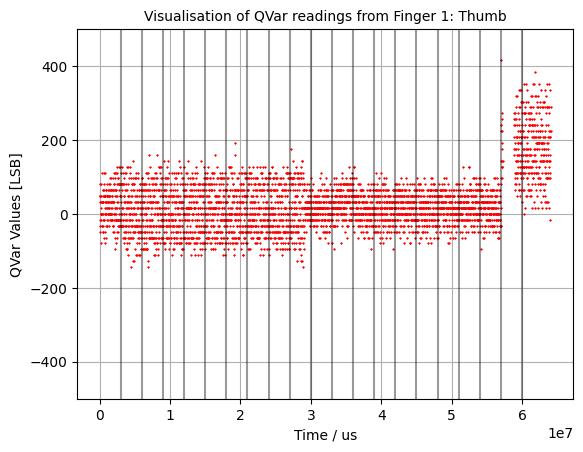

In [221]:
# Plot Qvar
PlotData(times,finger1,"Visualisation of QVar readings from Finger 1: Thumb",'r')
PlotIntervals()
plt.ylim(-500,500)
#plt.xlim(-1000,1000)

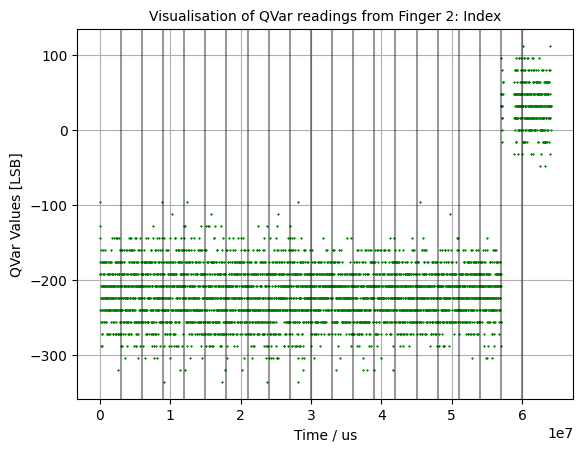

In [222]:
# Plot data 2
PlotData(times,finger2,"Visualisation of QVar readings from Finger 2: Index",'g')
PlotIntervals()
#plt.ylim(-500,500)

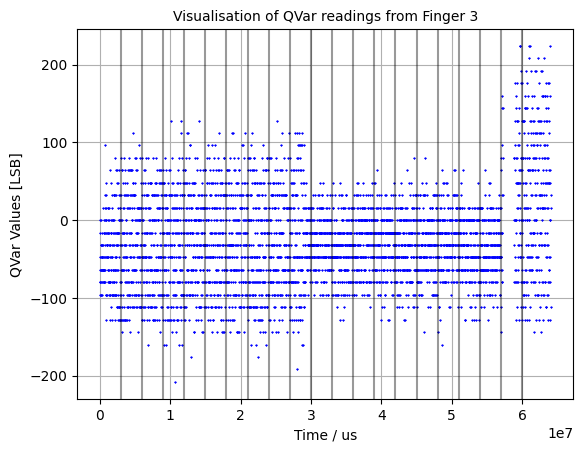

In [223]:
# Plot data 3
PlotData(times,finger3,"Visualisation of QVar readings from Finger 3",'b')
PlotIntervals()
#plt.ylim(-500,500)

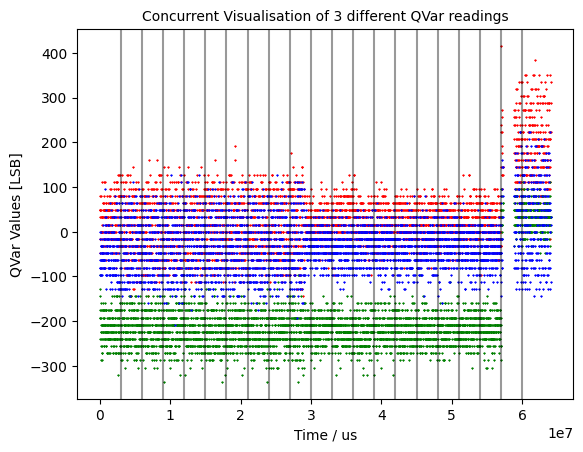

In [224]:
PlotData(times,finger1,"",'r')
PlotData(times,finger2,"",'g')
PlotData(times,finger3,"Concurrent Visualisation of 3 different QVar readings",'b')

PlotIntervals()

plt.grid()

# plt.ylim(-2000,2000)

#Trim Data

In [225]:
start_int_num = 0 # number of 3s intervals you want to cut from beginning
end_int_num = 0 # number of 3s intervals you want to cut from end
timelength = 60 # total length of test (in seconds)

# trim data to exact length of test (i.e. 60s)
times, finger1, finger2, finger3 = trim_data(times,finger1,finger2,finger3,timelength)
# trim unwanted intervals
times, finger1, finger2, finger3, restfirst = trim_interval_data(start_int_num, end_int_num, times, finger1, finger2, finger3)
# only take relevant intervals
times, finger1, finger2, finger3 = EveryOtherThree(times,finger1,finger2,finger3,restfirst)

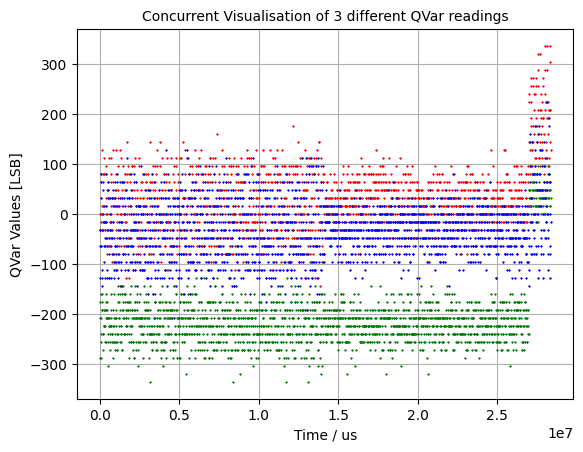

In [226]:
PlotData(times,finger1,"",'r')
PlotData(times,finger2,"",'g')
PlotData(times,finger3,"Concurrent Visualisation of 3 different QVar readings",'b')

#Format and Save Data

In [227]:
j = 0
# data_ar = []
data_ar = np.zeros((len(finger1),3))
while j < len(finger1):
    data_ar[j,0] = finger1[j]  #qvar_thumb
    data_ar[j,1] = finger2[j]  #qvar_index
    data_ar[j,2] = finger3[j]  #qvar_pinky
    j+=1

data_ar

array([[ -32., -208., -128.],
       [   0., -176.,  -64.],
       [ -32., -288.,  -32.],
       ...,
       [ 208.,   64.,  -80.],
       [ 144.,   16.,  -64.],
       [ 128.,   32.,  -16.]])

In [228]:
# np.savetxt(filename[0:-4]+'_processed.txt',data_ar,
#            delimiter='\t', fmt="%d",
#            header='QVar1 [LSB]\tQVar2 [LSB]\tQVar3 [LSB]\t',comments='') #thumb, #index, #pinky